# Walmart Black Friday Purchase Behaviour Analysis

## Problem Statement

Walmart is a leading American multinational retail corporation that operates a chain of supercenters, discount department stores, and grocery stores. The management team wants to understand **customer purchase behaviour** on **Black Friday**, focusing on how the **purchase amount** varies with:

- Gender (Male vs Female)
- Marital Status (Married vs Unmarried)
- Age groups (life-stage based)

They are particularly interested in answering:

- Do women spend more money per transaction than men on Black Friday?
- How different are the average spends for:
  - Male vs Female customers
  - Married vs Unmarried customers
  - Different age groups (0–17, 18–25, 26–35, 36–50, 51+)
- Can we use a **sample** of transactions to estimate the **population average spending** for:
  - 50 million male customers
  - 50 million female customers

We will:

1. Perform **Exploratory Data Analysis (EDA)**:
   - Understand data structure, types, summary statistics
   - Check for missing values and outliers
   - Plot univariate and bivariate relationships

2. Apply the **Central Limit Theorem (CLT)**:
   - Use **sample means** to estimate the **population mean**
   - Construct **confidence intervals (CIs)** (90%, 95%, 99%) for:
     - Male vs Female spending
     - Married vs Unmarried spending
     - Different Age groups

3. Provide **business insights and simple, actionable recommendations** for Walmart’s marketing and promotional strategy on Black Friday.

_Assumption_: The dataset is a sample of transactions drawn from a much larger population (50M male and 50M female Black Friday customers). We will use CLT to generalize insights from the sample to this population.

This notebook uses a tabular dataset of all users from walmart data, with columns such as:
- **User_ID**:	User ID
- **Product_ID**:	Product ID
- **Gender**:	Sex of User
- **Age**:	Age in bins
- **Occupation**:	Occupation(Masked)
- **City_Category**:	Category of the City (A,B,C)
- **Stay_In_Current_City_Years**:	Number of years stay in current city
- **Marital_Status**:	Marital Status
- **Product_Category**:	Product Category (Masked)
- **Purchase**:	Purchase Amount

## Data Import and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Basic Data Exploration

In this section we will:
- Check the shape and structure of the dataset
- Inspect data types
- Look at basic statistical summary
- Convert appropriate columns to categorical types

In [3]:
df.shape

(550068, 10)

In [4]:
df.columns.to_list()

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category',
 'Purchase']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [7]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [8]:
# Check unique values for each column (non-graphical analysis)
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].nunique(), "unique values")
    print(df[col].unique()[:10])


Column: User_ID
5891 unique values
[1000001 1000002 1000003 1000004 1000005 1000006 1000007 1000008 1000009
 1000010]

Column: Product_ID
3631 unique values
['P00069042' 'P00248942' 'P00087842' 'P00085442' 'P00285442' 'P00193542'
 'P00184942' 'P00346142' 'P0097242' 'P00274942']

Column: Gender
2 unique values
['F' 'M']

Column: Age
7 unique values
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Column: Occupation
21 unique values
[10 16 15  7 20  9  1 12 17  0]

Column: City_Category
3 unique values
['A' 'C' 'B']

Column: Stay_In_Current_City_Years
5 unique values
['2' '4+' '3' '1' '0']

Column: Marital_Status
2 unique values
[0 1]

Column: Product_Category
20 unique values
[ 3  1 12  8  5  4  2  6 14 11]

Column: Purchase
18105 unique values
[ 8370 15200  1422  1057  7969 15227 19215 15854 15686  7871]


In [9]:
# Converting suitable columns to category dtype
cat_cols = ["User_ID", "Product_ID", "Gender", "Age", "City_Category", "Stay_In_Current_City_Years",
            "Marital_Status"]

for col in cat_cols:
    df[col] = df[col].astype("category")

df.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

## Missing Value and Outlier Detection

We will:
- Detect missing values using `isnull()`
- Use `describe()` and boxplots to inspect outliers in `Purchase`
- Comment on the distribution using mean vs median

In [10]:
# Missing value count
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

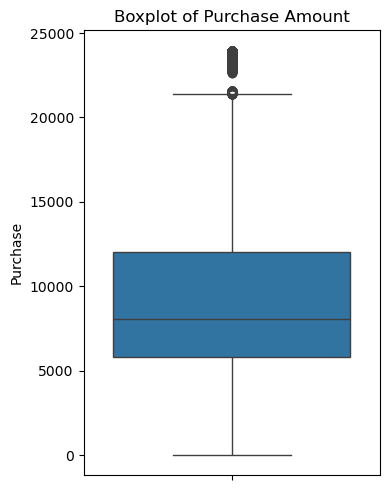

In [11]:
# Boxplot for Purchase to detect outliers
plt.figure(figsize=(4, 5))
sns.boxplot(y=df["Purchase"])
plt.title("Boxplot of Purchase Amount")
plt.tight_layout()
plt.show()

In [12]:
# Check mean vs median for Purchase

print(f"Purchase Mean: {df["Purchase"].mean():.2f}")
print(f"Purchase Median: {df["Purchase"].median():.2f}")
print(f"Purchase Std: {df["Purchase"].std():.2f}")

Purchase Mean: 9263.97
Purchase Median: 8047.00
Purchase Std: 5023.07


### Observations

- Our data contains no missing values
- Outliers in `Purchase` based on the boxplot:
  - values above around 22K treated as outliers, no extreme high values.
  - Distribution looks slightly right-skewed

## Univariate Analysis

We will explore distributions of:
- `Purchase` (continuous)
- Categorical variables: `Gender`, `Marital_Status`, `Age`, `City_Category`, etc.

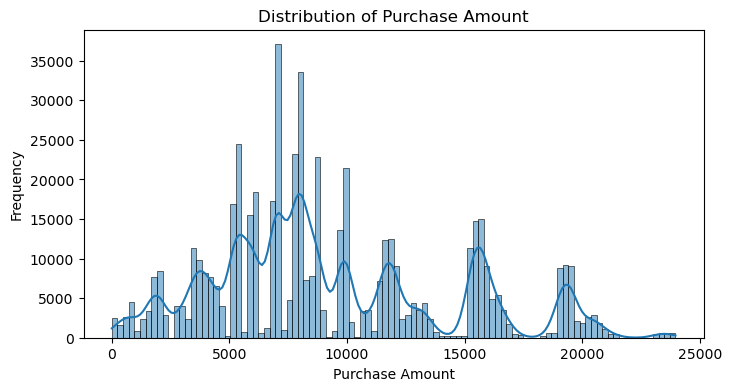

In [13]:
# Distribution of Purchase
plt.figure(figsize=(8, 4))
sns.histplot(df["Purchase"], bins=100, kde=True)
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

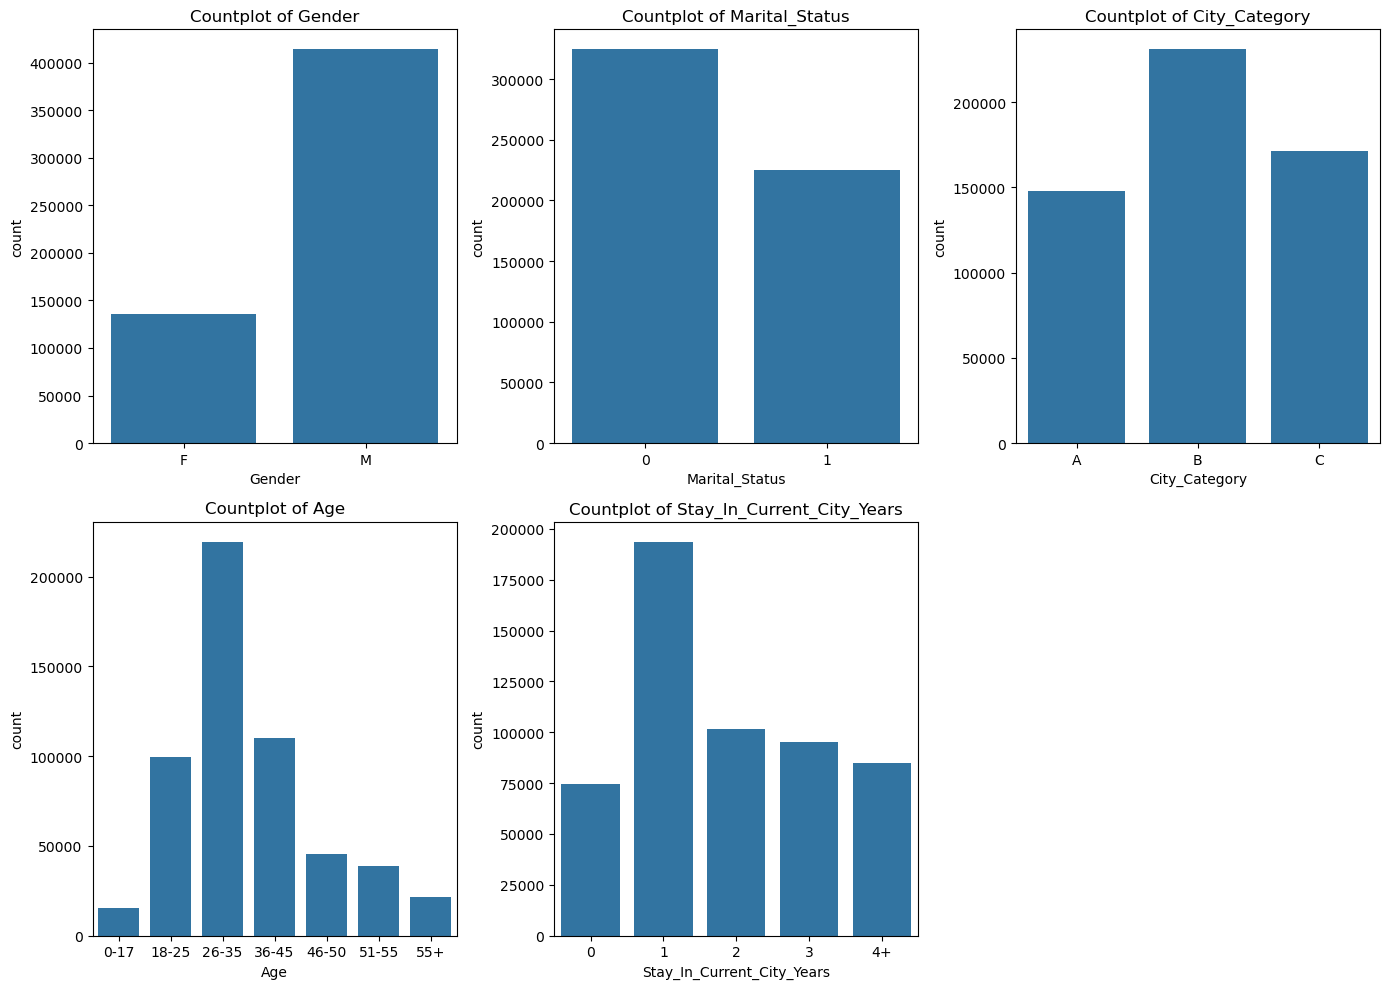

In [14]:
# Countplots for key categorical variables
cat_for_plot = ["Gender", "Marital_Status", "City_Category", "Age", "Stay_In_Current_City_Years"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_for_plot, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.xticks()
plt.tight_layout()
plt.show()

In [15]:
df['Marital_Status'].value_counts(normalize=True)

Marital_Status
0    0.590347
1    0.409653
Name: proportion, dtype: float64

### Univariate Observations

- **Purchase**:
  - Right-skewed (long tail of high purchasers)
  - Typical spending range (~60-120K).
- **Gender**:
  - Proportion of male vs female transactions in the dataset (0.753 : 0.246)
- **Age**:
  - (26-35) has the most transactions followed by 36-45, and 18-25.
- **Marital_Status**:
  - Share of married vs unmarried customers (0.4 : 0.6)
- **City_Category & Stay_In_Current_City_Years**:
  - **B** city type contributes most transactions.
  - More transactions coming from customers with shorter stays.

## Bivariate Analysis

We focus on how **Purchase** varies with:
- Gender
- Marital Status
- Age groups
- City category

We use:
- Boxplots to see distribution differences
- Barplots of mean purchase amount
- Correlation for numeric variables

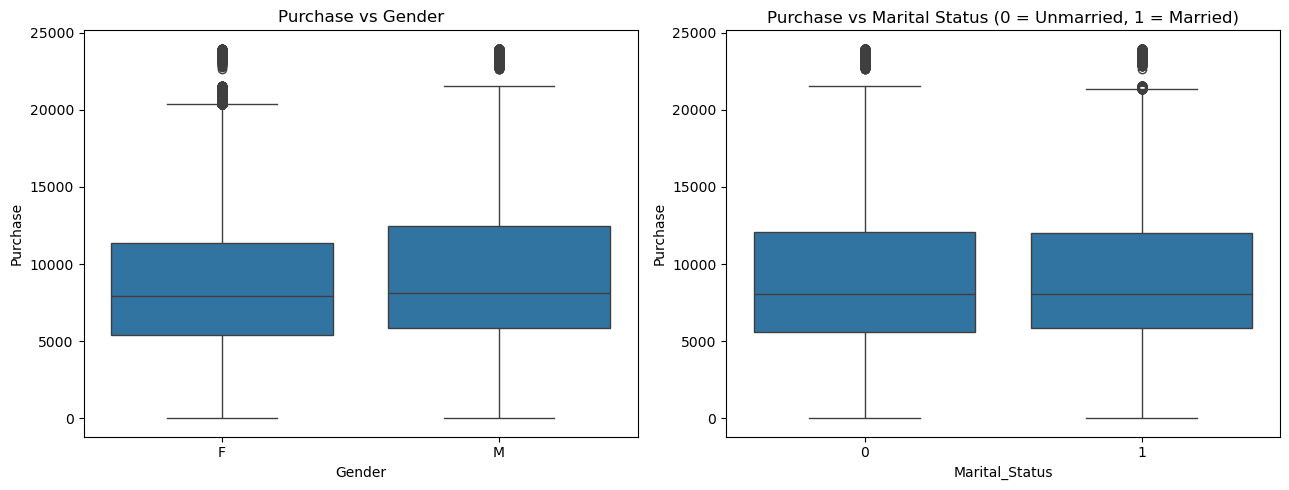

In [16]:
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Gender", y="Purchase", data=df)
plt.title("Purchase vs Gender")

plt.subplot(1, 2, 2)
sns.boxplot(x="Marital_Status", y="Purchase", data=df)
plt.title("Purchase vs Marital Status (0 = Unmarried, 1 = Married)")
plt.tight_layout()
plt.show()

In [17]:
# Mean purchase by gender and marital status
print("Mean Purchase by Gender:")
print(df.groupby("Gender")["Purchase"].mean().round(3))

print("\nMean Purchase by Marital Status (0=Unmarried, 1=Married):")
print(df.groupby("Marital_Status")["Purchase"].mean().round(3
                                                           ))

Mean Purchase by Gender:
Gender
F    8734.566
M    9437.526
Name: Purchase, dtype: float64

Mean Purchase by Marital Status (0=Unmarried, 1=Married):
Marital_Status
0    9265.908
1    9261.175
Name: Purchase, dtype: float64


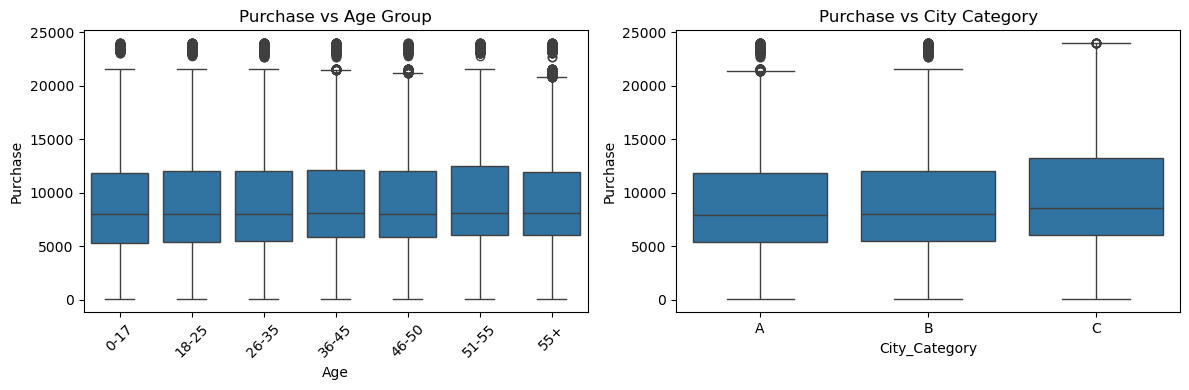

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x="Age", y="Purchase", data=df, order=sorted(df["Age"].unique()))
plt.title("Purchase vs Age Group")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x="City_Category", y="Purchase", data=df)
plt.title("Purchase vs City Category")

plt.tight_layout()
plt.show()

In [19]:
print("Mean Purchase by Age Group:")
print(df.groupby("Age")["Purchase"].mean().sort_index().round(3))

Mean Purchase by Age Group:
Age
0-17     8933.465
18-25    9169.664
26-35    9252.691
36-45    9331.351
46-50    9208.626
51-55    9534.808
55+      9336.280
Name: Purchase, dtype: float64


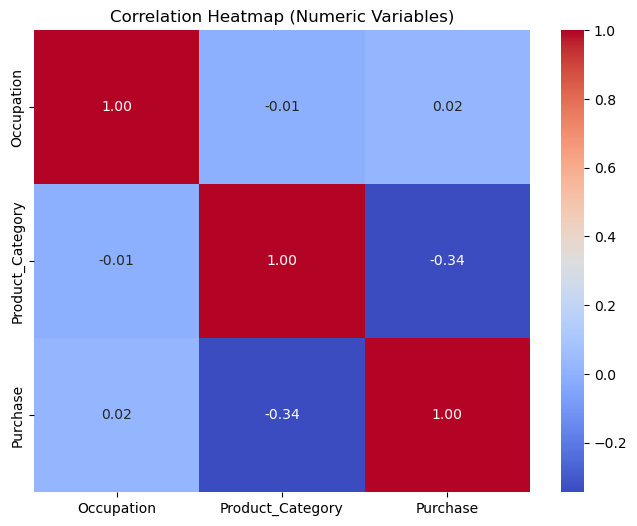

In [20]:
# Select numeric columns for correlation
num_cols = df.select_dtypes(include=["int64"]).columns
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()

In [21]:
df.groupby('City_Category')['Purchase'].mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

### Bivariate Observations

- **Gender vs Purchase**:
  - Median purchases of both genders is similar.

- **Marital_Status vs Purchase**:
  - Median purchases of married and single customers is similar.

- **Age vs Purchase**:
  - Age group (51-55) has the highest avg. purchases.
  - Median purchases similar across all age groups.

- **City_Category vs Purchase**:
  - **'C'** city category has highest average purchase.
  - Median purchases similar across all.

- **Correlation**:
  - `Purchase` slightly negatively correlated with `Product_Category`.

## Central Limit Theorem and Confidence Intervals

In [22]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    h = stats.t.ppf((1 + confidence) / 2, n - 1) * sem
    return mean, mean - h, mean + h

### Gender-wise Confidence Intervals

We now estimate confidence intervals of **average purchase per transaction** for:
- Female customers
- Male customers

This allows us to generalize from the sample to the population (50M male & 50M female).

In [23]:
female_purchase = df.loc[df["Gender"] == "F", "Purchase"]
male_purchase   = df.loc[df["Gender"] == "M", "Purchase"]

for conf in [0.90, 0.95, 0.99]:
    f_mean, f_low, f_high = mean_confidence_interval(female_purchase, confidence=conf)
    m_mean, m_low, m_high = mean_confidence_interval(male_purchase, confidence=conf)

    print(f"\nConfidence Level: {int(conf*100)}%")
    print(f"Female mean: {f_mean:.2f}, CI: [{f_low:.2f}, {f_high:.2f}]")
    print(f"Male   mean: {m_mean:.2f}, CI: [{m_low:.2f}, {m_high:.2f}]")


Confidence Level: 90%
Female mean: 8734.57, CI: [8713.29, 8755.84]
Male   mean: 9437.53, CI: [9424.51, 9450.54]

Confidence Level: 95%
Female mean: 8734.57, CI: [8709.21, 8759.92]
Male   mean: 9437.53, CI: [9422.02, 9453.03]

Confidence Level: 99%
Female mean: 8734.57, CI: [8701.24, 8767.89]
Male   mean: 9437.53, CI: [9417.15, 9457.91]


#### Interpretation Notes

- **male mean** spends are larger than **female mean** spends.
- **95% CIs overlap**:
  - CIs **do not overlap much**; there is strong evidence of a difference in average spending.

> “At 95% confidence, average female spending lies between 8709.21 and 8759.92, and average male spending lies between 9422.02 and 9453.03. The intervals do not overlap, suggesting that women do not spend more per transaction than men on Black Friday in this sample.”

### Central Limit Theorem – Sampling Distribution of Mean

We now:
- Draw repeated random samples of different sizes (e.g., 30, 100, 500, 1000)  
- Compute sample means for Male and Female separately  
- Visualize the distribution of these sample means  
- Observe how the distribution becomes more **normal** and **tighter** as sample size increases

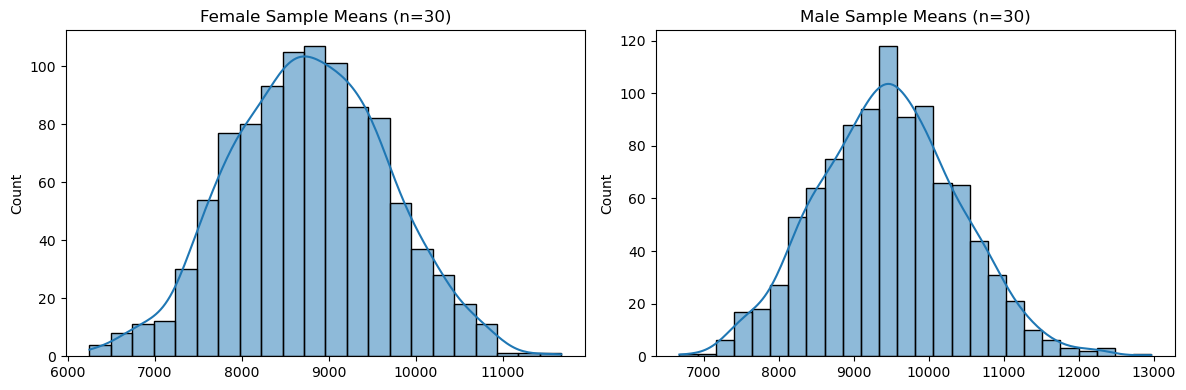

Sample size 30:
Female mean of means: 8777.74, std: 885.91
Male   mean of means: 9458.45, std: 931.51


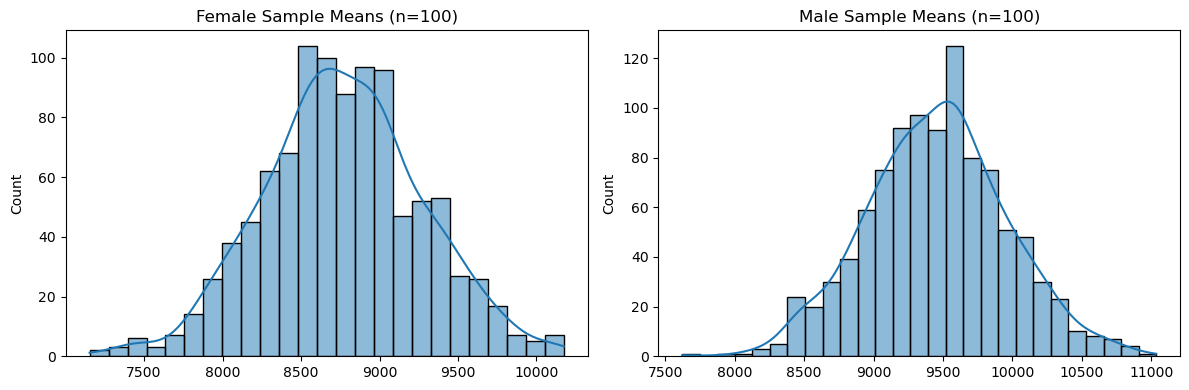

Sample size 100:
Female mean of means: 8766.33, std: 503.70
Male   mean of means: 9455.52, std: 502.39


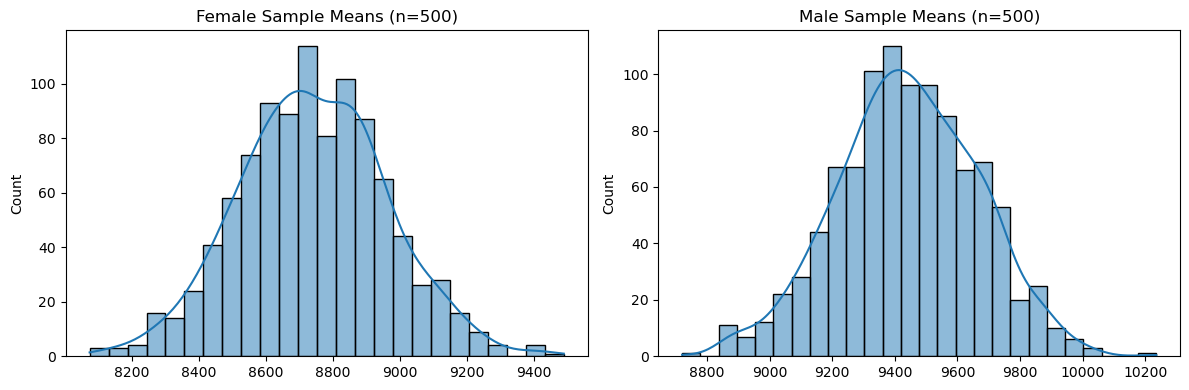

Sample size 500:
Female mean of means: 8740.56, std: 220.12
Male   mean of means: 9441.79, std: 224.42


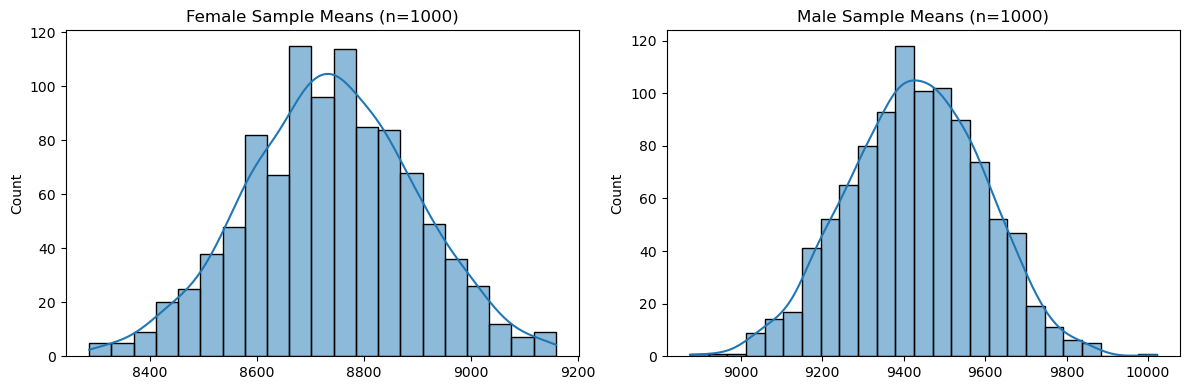

Sample size 1000:
Female mean of means: 8738.74, std: 157.10
Male   mean of means: 9429.51, std: 165.04


In [24]:
def simulate_sample_means(data, sample_size=30, n_samples=1000, random_state=42):
    np.random.seed(random_state)
    means = []
    for _ in range(n_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))
    return np.array(means)

sample_sizes = [30, 100, 500, 1000]

for n in sample_sizes:
    female_means = simulate_sample_means(female_purchase, sample_size=n)
    male_means   = simulate_sample_means(male_purchase, sample_size=n)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(female_means, kde=True)
    plt.title(f"Female Sample Means (n={n})")

    plt.subplot(1, 2, 2)
    sns.histplot(male_means, kde=True)
    plt.title(f"Male Sample Means (n={n})")

    plt.tight_layout()
    plt.show()

    print(f"Sample size {n}:")
    print(f"Female mean of means: {female_means.mean():.2f}, std: {female_means.std():.2f}")
    print(f"Male   mean of means: {male_means.mean():.2f}, std: {male_means.std():.2f}")

#### CLT Observations

- As sample size **increases**, the distribution of sample means:
  - Becomes **more symmetric & bell-shaped** (normal-like).
  - Has **smaller spread** (standard deviation decreases).
- This supports the **Central Limit Theorem**, which justifies using normal-based confidence intervals for large samples.

### Married vs Unmarried – Confidence Intervals

In [25]:
unmarried_purchase = df.loc[df["Marital_Status"] == 0, "Purchase"]
married_purchase   = df.loc[df["Marital_Status"] == 1, "Purchase"]

for conf in [0.90, 0.95, 0.99]:
    u_mean, u_low, u_high = mean_confidence_interval(unmarried_purchase, confidence=conf)
    mar_mean, mar_low, mar_high = mean_confidence_interval(married_purchase, confidence=conf)

    print(f"\nConfidence Level: {int(conf*100)}%")
    print(f"Unmarried mean: {u_mean:.2f}, CI: [{u_low:.2f}, {u_high:.2f}]")
    print(f"Married   mean: {mar_mean:.2f}, CI: [{mar_low:.2f}, {mar_high:.2f}]")


Confidence Level: 90%
Unmarried mean: 9265.91, CI: [9251.40, 9280.42]
Married   mean: 9261.17, CI: [9243.79, 9278.56]

Confidence Level: 95%
Unmarried mean: 9265.91, CI: [9248.62, 9283.20]
Married   mean: 9261.17, CI: [9240.46, 9281.89]

Confidence Level: 99%
Unmarried mean: 9265.91, CI: [9243.18, 9288.63]
Married   mean: 9261.17, CI: [9233.95, 9288.40]


#### Interpretation Notes

- **Married vs unmarried** customers have similar means.
- **95% CIs overlap**:
  - CIs **do overlap** which is strong evidence of no difference in average spending.

> “At 95% confidence, average Unmarried spending lies between 9248.62 and 9283.20, and average Married spending lies between 9240.46 and 9281.89. The intervals do overlap, suggesting that Married and Unmarried customers have similar spends per transaction on Black Friday in this sample.”

### Age-wise Analysis with Life-stage Bins

In [26]:
# Map original Age to life-stage bins
age_map = {
    "0-17": "0-17",
    "18-25": "18-25",
    "26-35": "26-35",
    "36-45": "36-50",
    "46-50": "36-50",
    "51-55": "51+",
    "55+": "51+"
}

df["Age_LifeStage"] = df["Age"].map(age_map)
df["Age_LifeStage"] = df["Age_LifeStage"].astype("category")

df["Age_LifeStage"].value_counts().sort_index()

Age_LifeStage
0-17      15102
18-25     99660
26-35    219587
36-50    155714
51+       60005
Name: count, dtype: int64

In [27]:
# Mean purchase by life-stage age bin
df.groupby("Age_LifeStage")["Purchase"].mean().sort_index().round(3)

Age_LifeStage
0-17     8933.465
18-25    9169.664
26-35    9252.691
36-50    9295.332
51+      9463.662
Name: Purchase, dtype: float64

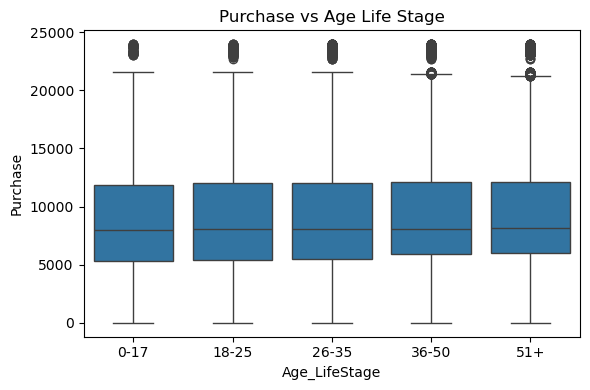

In [28]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x="Age_LifeStage", y="Purchase", data=df,
            order=["0-17", "18-25", "26-35", "36-50", "51+"])
plt.title("Purchase vs Age Life Stage")
plt.tight_layout()
plt.show()

In [29]:
# Confidence intervals by Age_LifeStage at 95%
for age_bin in ["0-17", "18-25", "26-35", "36-50", "51+"]:
    data_bin = df.loc[df["Age_LifeStage"] == age_bin, "Purchase"]
    mean, low, high = mean_confidence_interval(data_bin, confidence=0.95)
    print(f"{age_bin}: mean={mean:.2f}, 95% CI=[{low:.2f}, {high:.2f}]")

0-17: mean=8933.46, 95% CI=[8851.94, 9014.99]
18-25: mean=9169.66, 95% CI=[9138.41, 9200.92]
26-35: mean=9252.69, 95% CI=[9231.73, 9273.65]
36-50: mean=9295.33, 95% CI=[9270.46, 9320.20]
51+: mean=9463.66, 95% CI=[9423.17, 9504.16]


#### Interpretation Notes

- **51+** life-stage has the **highest average spending**
- For planning marketing, age groups with **high mean and relatively tight CIs** (51+, 36-50) are strong target segments.

## Final Insights

### Gender

- Average female spending per transaction: around **8734.57** with 95% CI [8709.21, 8759.92].
- Average male spending per transaction: around **9437.53** with 95% CI [9422.02, 9453.03].
- The confidence intervals for male and female spending **do not overlap**.
    - There is statistically significant evidence that **men** spend more.

### Marital Status

- Married customers spend on average **9261.17**, with CI [9240.46, 9281.89].
- Unmarried customers spend **9265.91**, with CI [9248.62, 9283.20].
- One group does not consistently spends more since the CIs overlap.

### Age Life Stages

- Age group **51+** shows the **highest average spending**.
- Younger (0–17) show lower average spending and fewer transactions.
- CIs show how stable these age-based differences are, since CIs are non-overlapping.

### Other Insights

- City category **C** show higher spendings.
- Years in city show mild relationships with spending (1-2 years being the highest spenders).
- Purchase distribution is likely **right-skewed** with a long tail of high-value transactions.

## Recommendations for Walmart

Based on the analysis, Walmart can consider the following actions for Black Friday:

1. **Target the higher-spending gender segment**
   - Design **male-focused Black Friday campaigns** (email, app notifications, social media).
   - Highlight categories that men buy more from **electronics, gadgets, and big-ticket items**.

2. **Personalize offers by marital status**
    - Create **“family bundle” deals**, combo offers (kids + household items).
    - Promote **bulk offers** and “stock-up” discounts.
    - Focus on **single-serve, lifestyle, gadgets, and convenience products**.

3. **Age-based promotions**
   - Focus on age groups with **highest average spending** (e.g., 51+):
     - Tailor offers around **career, family, and home improvement**.
     - Use targeted digital ads on channels popular with these age groups.
   - Offer **youth-oriented deals** (0–17, 18–25):
     - Gaming, fashion, accessories, and student-friendly products.
   - For **51+**:
     - Health, wellness, home comfort products and easy shopping experience.

4. **City-specific strategies**
    - Allocate more **marketing budget** and **inventory** to those city category type **C**.
    - Adjust store layout or online recommendations based on popular categories there.

5. **Use confidence intervals for planning**
   - Use the estimated **average spend per transaction** (with CIs) to:
     - Forecast **expected revenue** from male vs female customers.
     - Set **realistic sales targets** for each segment.
     - Plan **inventory levels** and **staffing** based on expected traffic and basket size.

6. **Continuous learning**
   - Repeat this analysis each year for Black Friday:
     - Track whether the same segments remain high-value.
     - Update campaigns and product mix based on **new data**.

Overall, these steps help Walmart **spend marketing money where it brings the maximum return** and **design offers** that match how different customer groups actually shop on Black Friday.